## <b>Reservoir characterization using ML algorithm</b>
<i>Author : Jongwook Kim  
Last update : 23-Feb-2023
</i>

<u><b>Package description</b></u>
This package includes 3 main algorithms based on ensembles for data assimilation and provides vectorization(so called, parameterization) models for satisfying gaussian assumption of ensemble methods.

- <b>Data assimilation algorithms [algorithms.py]</b>
    1. EnKF(Ensemble Kalman filter)
    2. ES(Ensemble Smoother)
    3. ES-MDA(Ensemble Smoother with multiple data assimilation)

- <b>Vectorization models [dlmodels.py, vectorization.py]<b>
    1. CAE(Convolutional autoencoder)
    2. VAE(Variational autoencoder)

In [1]:
%load_ext autoreload
%autoreload 2
import argparse
import torch
import os
from utils import *
from ensemble import Ensemble
from characterization import Ensemble_method
from vecterization import GenerativeModel

c:\Users\Jeon\anaconda3\envs\HoJang_env_gpu\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


### <b>Initialization

In [2]:
parser = argparse.ArgumentParser()
args, unknown = parser.parse_known_args()

args.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
args.num_of_realization = 201
args.nx = 25
args.ny = 25
args.nz = 1 
args.ngrid = args.nx * args.ny * args.nz
args.num_of_observed_well = 8

args.stepsize = 20
args.history_time = 600
args.total_time = 1800
args.num_of_Atime = int(args.history_time / args.stepsize)
args.num_of_Ptime = int(args.total_time / args.stepsize)
args.num_of_APtime = int(args.num_of_Ptime - args.num_of_Atime)
args.Atime = np.linspace(args.stepsize,args.history_time,args.num_of_Atime)
args.Ptime = np.linspace(args.stepsize,args.total_time,args.num_of_Ptime)
args.APtime = np.linspace(args.history_time+args.stepsize,args.total_time,args.num_of_Ptime - args.num_of_Atime)

args.PATH = os.getcwd()
args.filepath = 'data'
args.original_filename = 'Gen'
args.ecl_filename = '2D_WOOGIE'
args.solution_filename = '2D_SOLUTION'
args.perm_filename = '2D_PERMX'
args.tstep_filename = '2D_TSTEP'

args.simulation_directory = 'simulation'
args.reference_directory = 'ref'
args.initial_directory = 'ini'
args.assimilation_directory = 'assimilation'
args.mean_directory = 'mean'

args.characterization_algorithm = 'EnKF'
args.reference_number = 41
args.observation_label = ['WOPR']
args.k_sand = 2000
args.k_clay = 20

args.isnew = True
args.parallel = True
args.max_process = 8

args.vector = False
args.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
args.encoded_space_dim = 100
args.fc_input_dim = 128
args.batch_size = 128
args.num_epoch = 250
args.training_filename = 'Training'
args.train_ratio = 0.7
args.valid_ratio = 0.15
args.train_model_saved_dir = './model'

In [3]:
if not os.path.exists(args.train_model_saved_dir):
    print('model_saved_dir not exists. Will be generated.')
    os.mkdir(args.train_model_saved_dir)
    print('Directory generation finished!')

perm = get_parameters(args.original_filename, args.filepath, True, args.k_sand, args.k_clay)
initial = []
ensembles = []

for idx in range(args.num_of_realization):
    if idx == args.reference_number:
        reference = Ensemble(args, perm[idx])
    else:
        ensembles.append(Ensemble(args, perm[idx]))
        initial.append(Ensemble(args, perm[idx]))
for idx, en in enumerate(ensembles):
    en.perm._name = idx
reference.characterization_algorithm = 'ref'
for ini in initial: ini.characterization_algorithm = 'initial'
clear_rsm(args)

RSM clear


<b> Reference model in this case

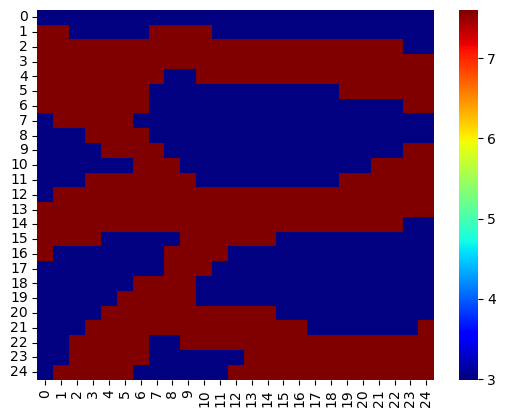

In [4]:
draw_perm(reference, args)

<b> Mean of initial ensembles in this case

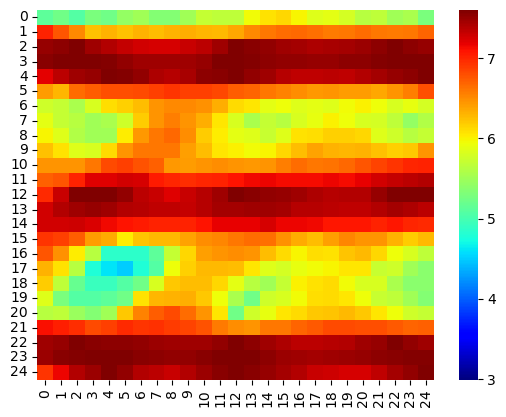

In [5]:
draw_perm(ensembles, args)

### <b>1. EnKF 

#### <b>1.1 set reference & initial data

In [6]:
reference.eclipse_parallel(args.reference_directory, 0)
reference.ecl_results(args.reference_directory)
print('Reference case simulation')

Reference case simulation


In [7]:
solution = Ensemble_method(args)
initial_ensemble = solution.evaluate(initial, reference, args.initial_directory)
remove_rsm(args.initial_directory, args)

  0%|          | 0/200 [00:00<?, ?it/s]

HM error (%) : 190.13 
HM error after given data (%) : 246.33


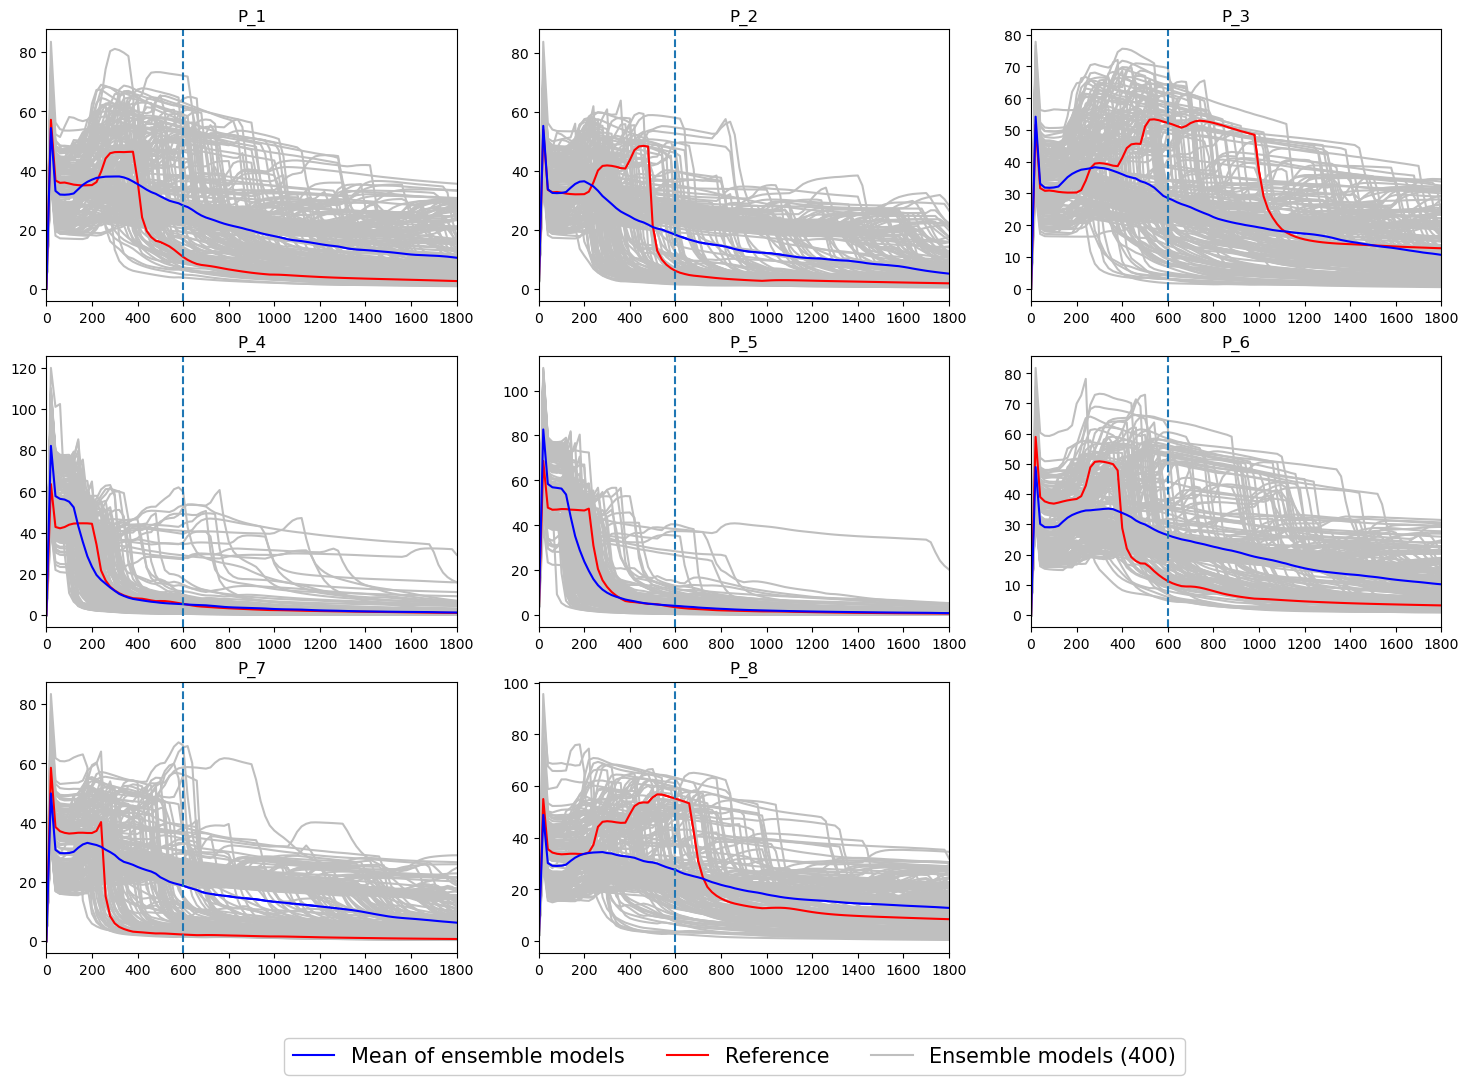

In [8]:
draw_label(initial_ensemble, reference, 'WOPR', args)

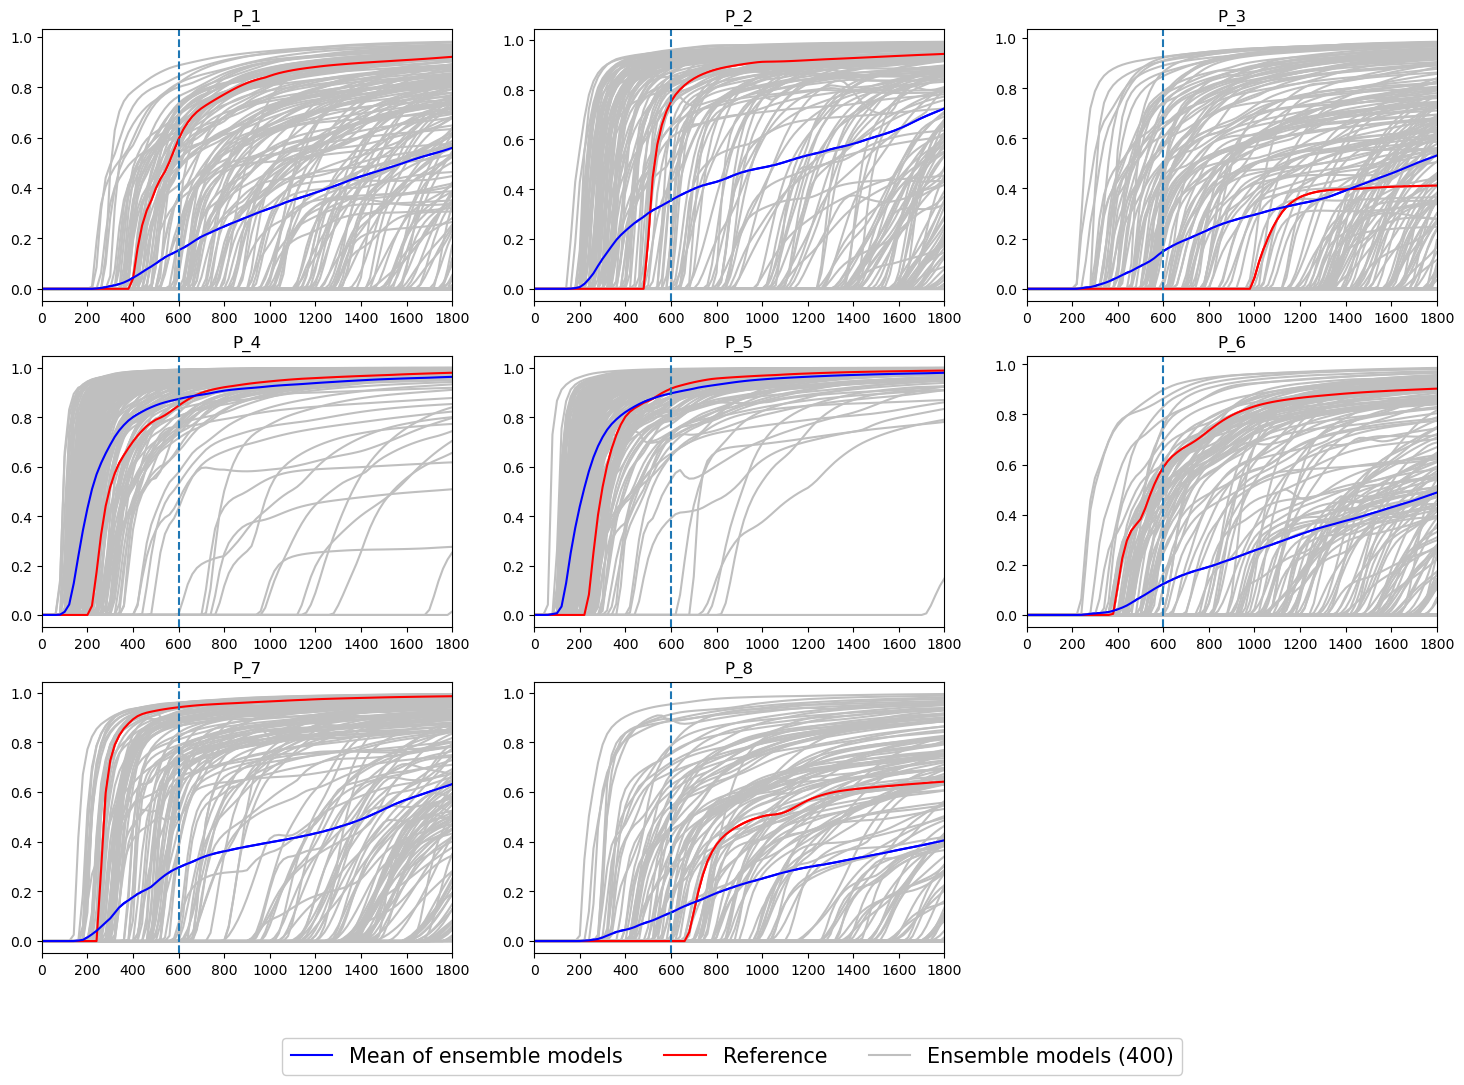

In [9]:
draw_label(initial_ensemble, reference, 'WWCT', args)

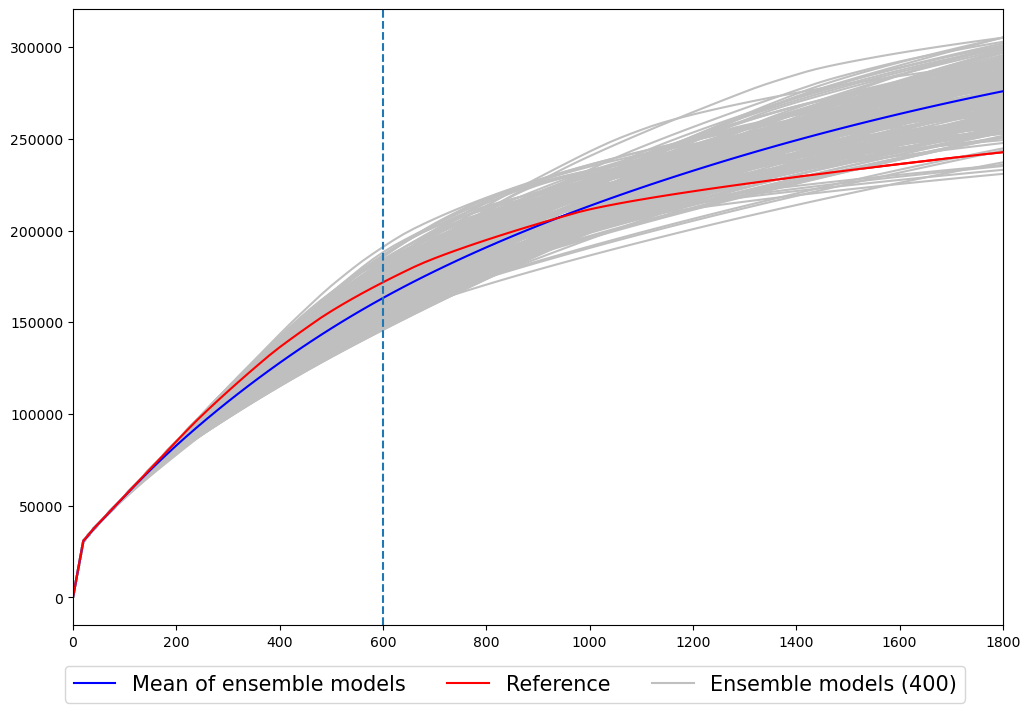

In [10]:
draw_field_label(initial_ensemble, reference, 'FOPT', args)

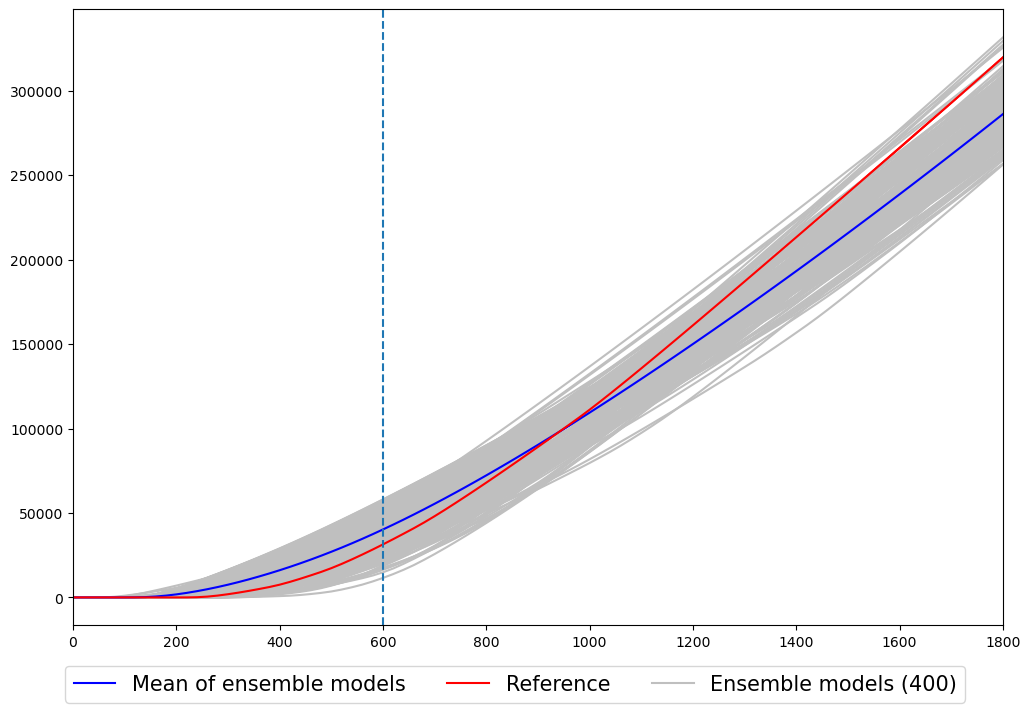

In [11]:
draw_field_label(initial_ensemble, reference, 'FWPT', args)

#### <b>1.2 Data assimilation using EnKF

In [12]:
solution = Ensemble_method(args)
updated_ensembles = solution.iterate(ensembles, reference,isnew=True)
evaulated_ensembles_EnKF = solution.evaluate(updated_ensembles, reference)
print('Finish!')
remove_rsm(args.assimilation_directory, args)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

HM error (%) : 65.18 
HM error after given data (%) : 70.86
Finish!


#### <b>1.3 History match results using EnKF

<i> Well oil production rate

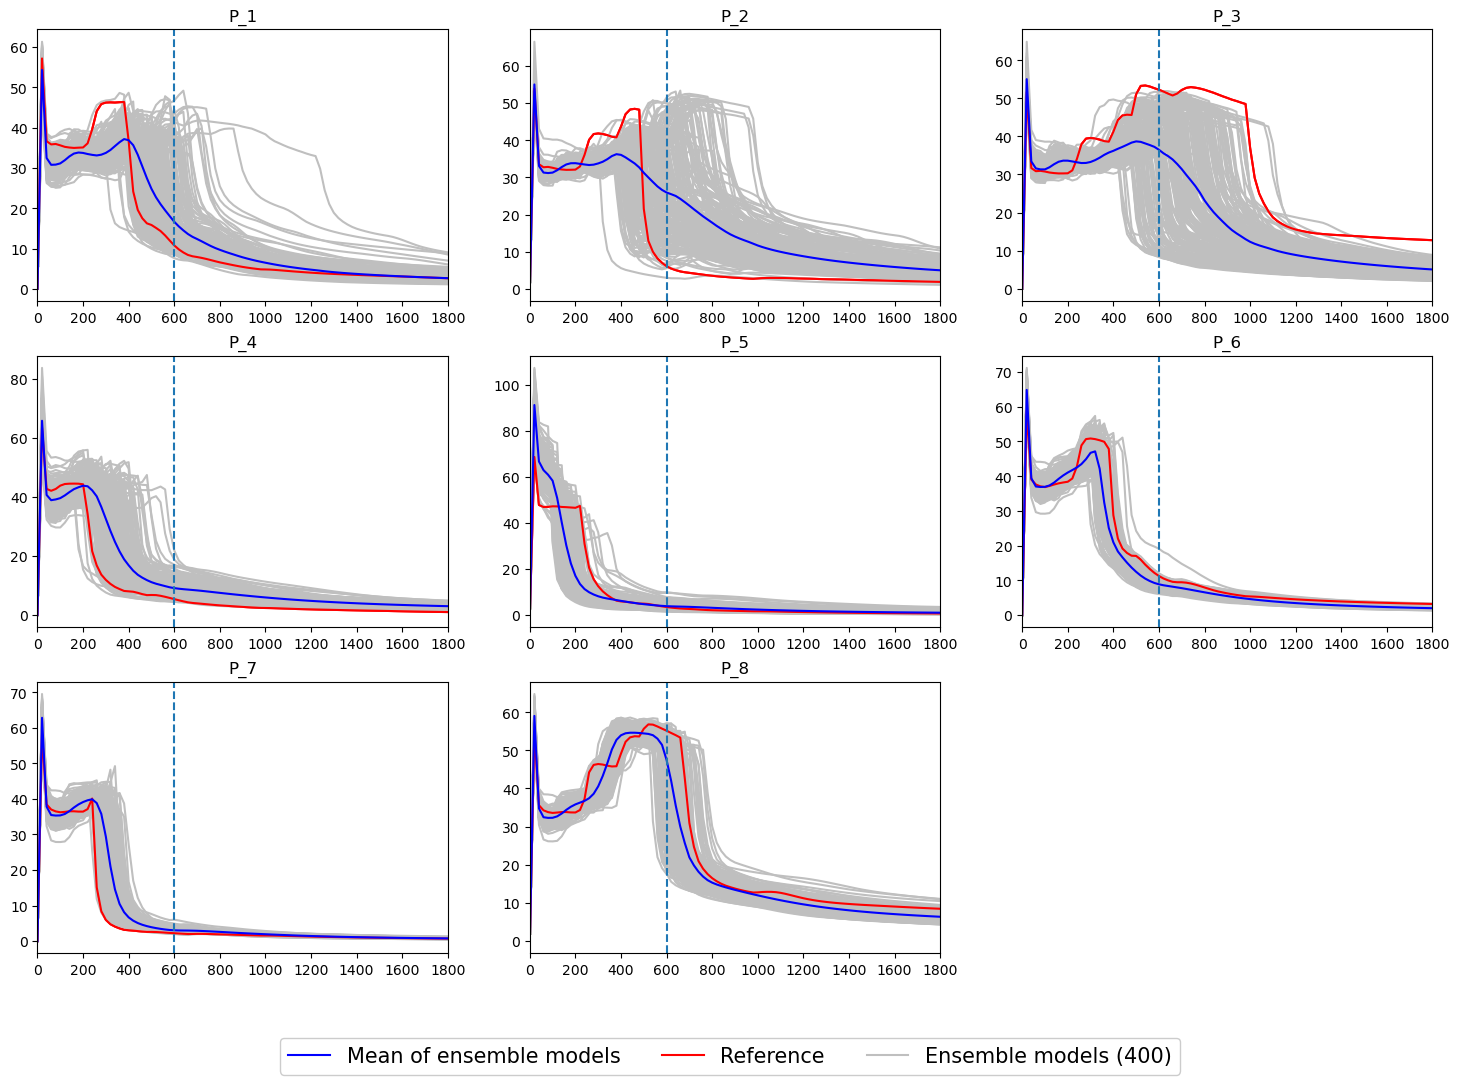

In [13]:
draw_label(evaulated_ensembles_EnKF, reference, 'WOPR', args)

<i> Well water cut

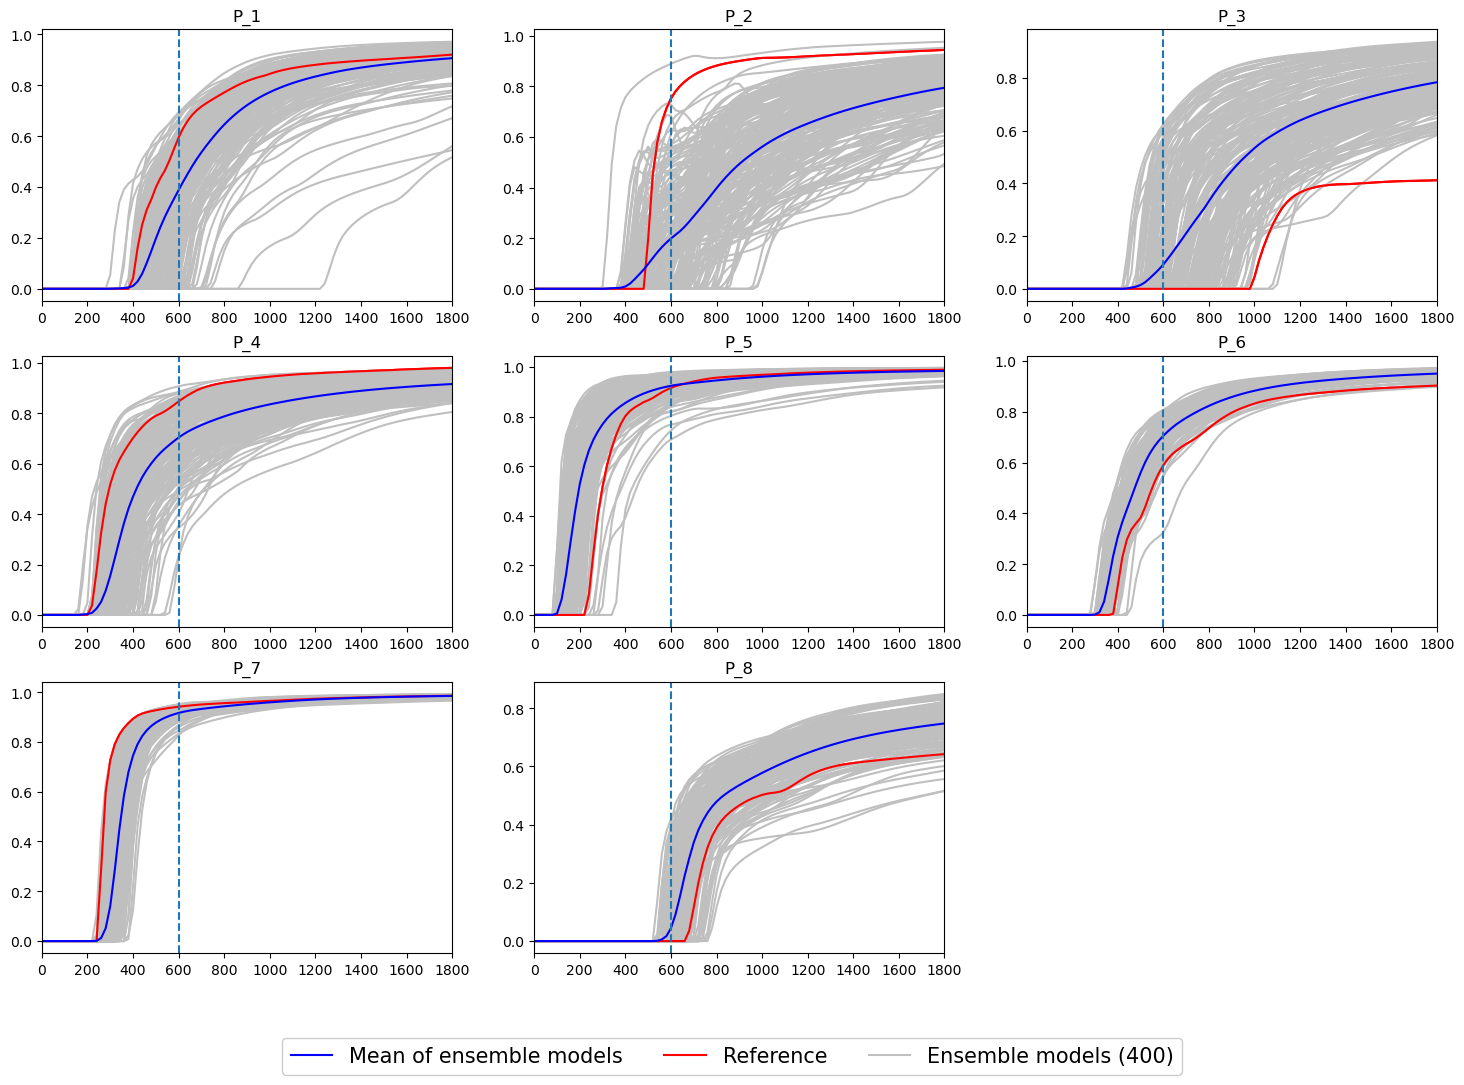

In [14]:
draw_label(evaulated_ensembles_EnKF, reference, 'WWCT', args)

<i> Cumulative field oil production

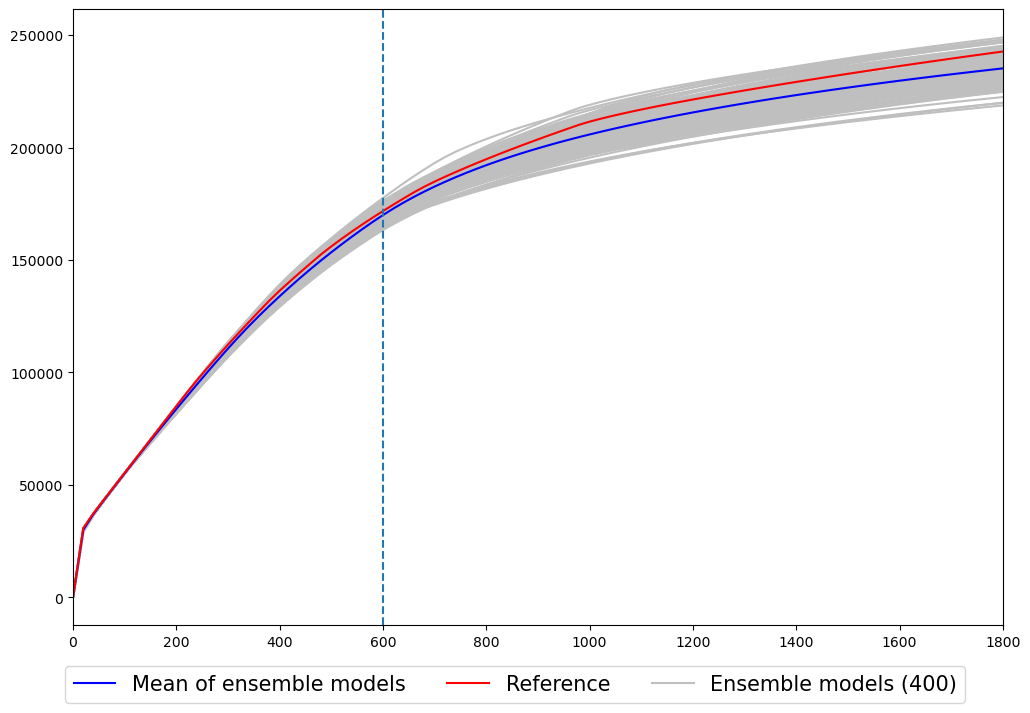

In [15]:
draw_field_label(evaulated_ensembles_EnKF, reference, 'FOPT', args)

<i> Cumulative field water production

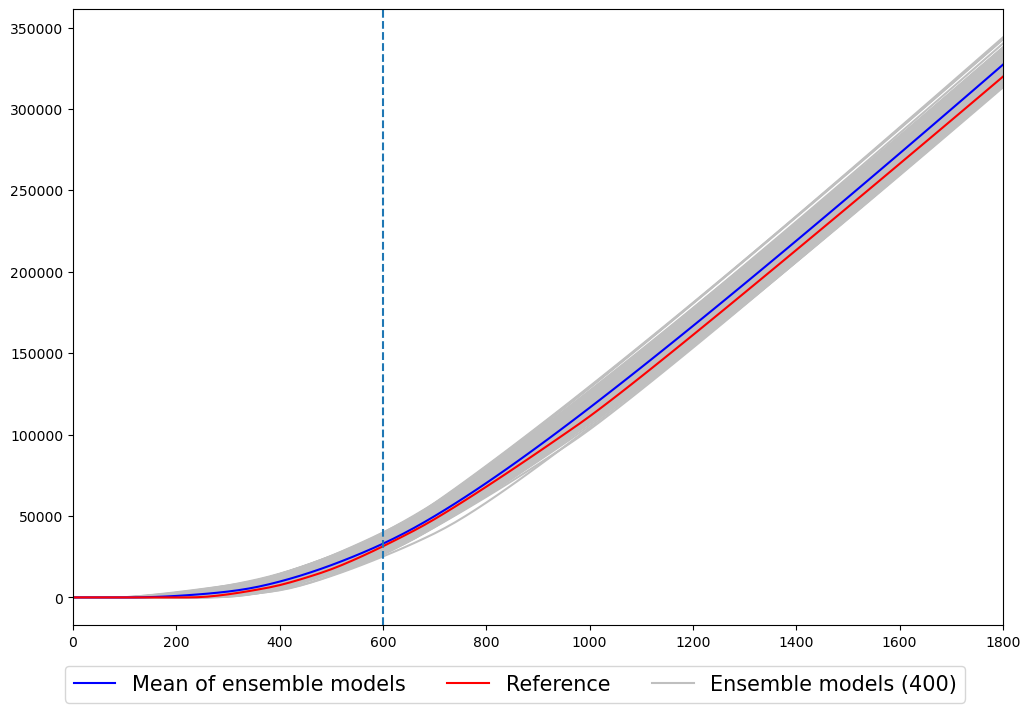

In [16]:
draw_field_label(evaulated_ensembles_EnKF, reference, 'FWPT', args)

### <b>2. ES

#### <b>2.1 Set ensemble objects

In [17]:
args.characterization_algorithm = 'ES'
ensembles_ES = []
for idx in range(args.num_of_realization):
    if not idx == args.reference_number:
        ensembles_ES.append(Ensemble(args, perm[idx]))
for idx, en in enumerate(ensembles_ES):
    en.perm._name = idx
    en.characterization_algorithm = 'ES'

#### <b>2.2 Data assimilation using ES

In [18]:
solution = Ensemble_method(args, num_of_data=1)
updated_ensembles = solution.iterate(ensembles_ES, reference,isnew=True)
print('Finish!')

  0%|          | 0/200 [00:00<?, ?it/s]

Finish!


In [19]:
remove_rsm(args.assimilation_directory, args)
evaulated_ensembles_ES = solution.evaluate(updated_ensembles, reference)
remove_rsm(args.assimilation_directory, args)

  0%|          | 0/200 [00:00<?, ?it/s]

HM error (%) : 129.87 
HM error after given data (%) : 104.95


#### <b>2.3 History match results using ES

<i> Well oil production rate

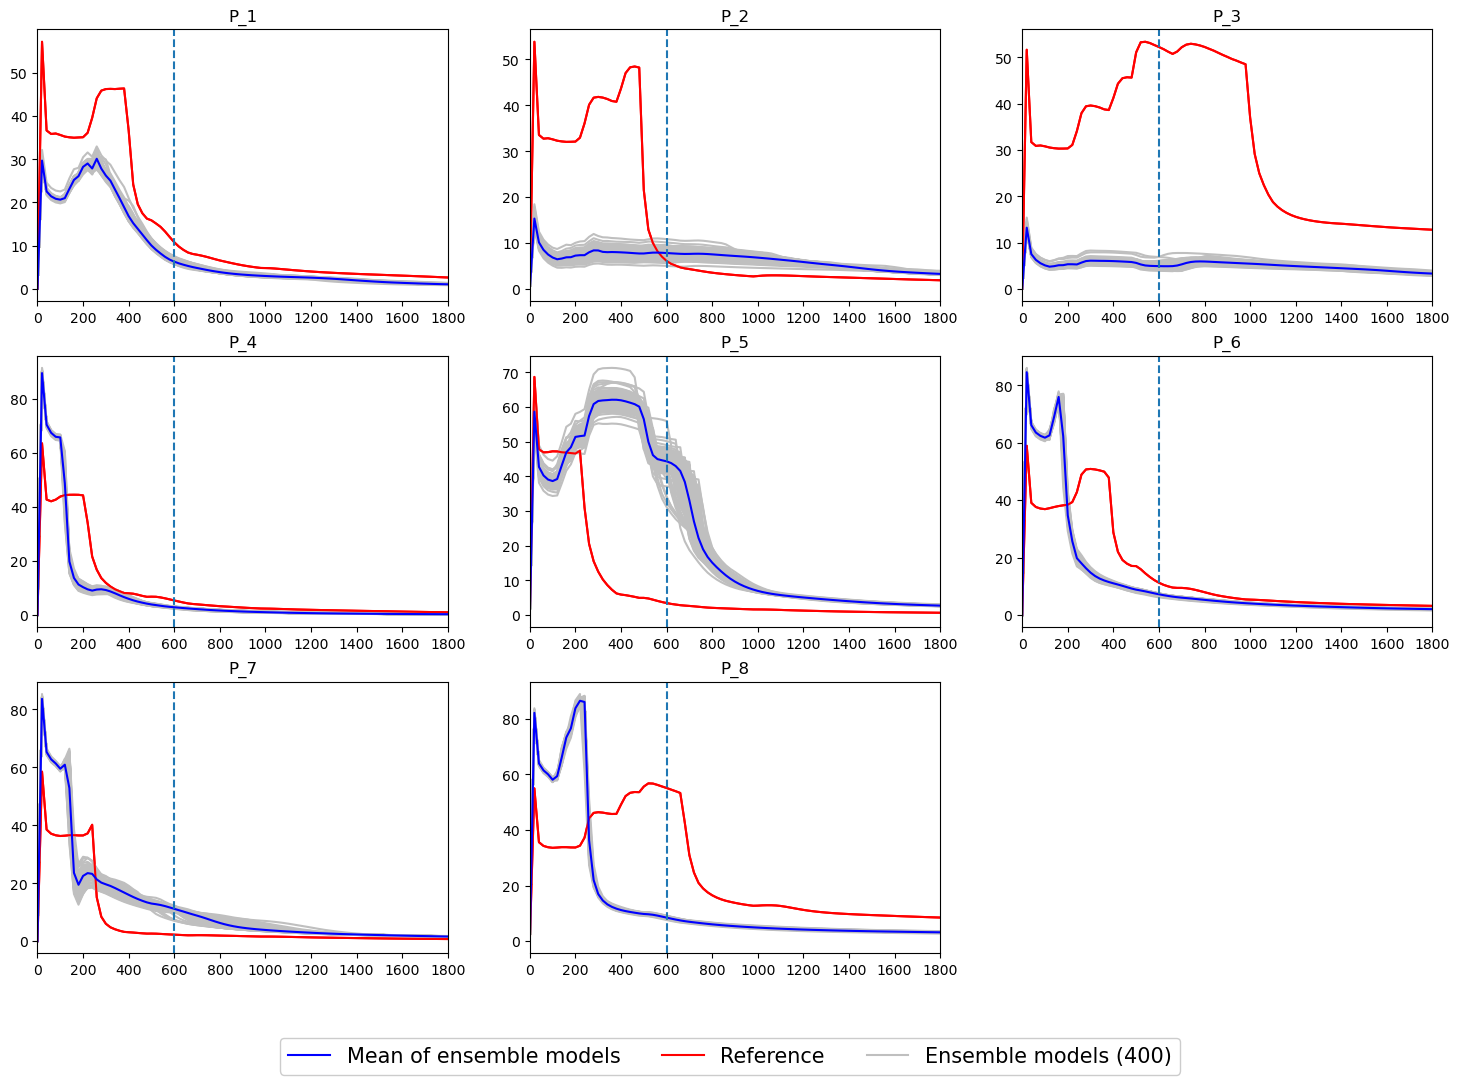

In [20]:
draw_label(evaulated_ensembles_ES, reference, 'WOPR', args)

<i> Well watercut

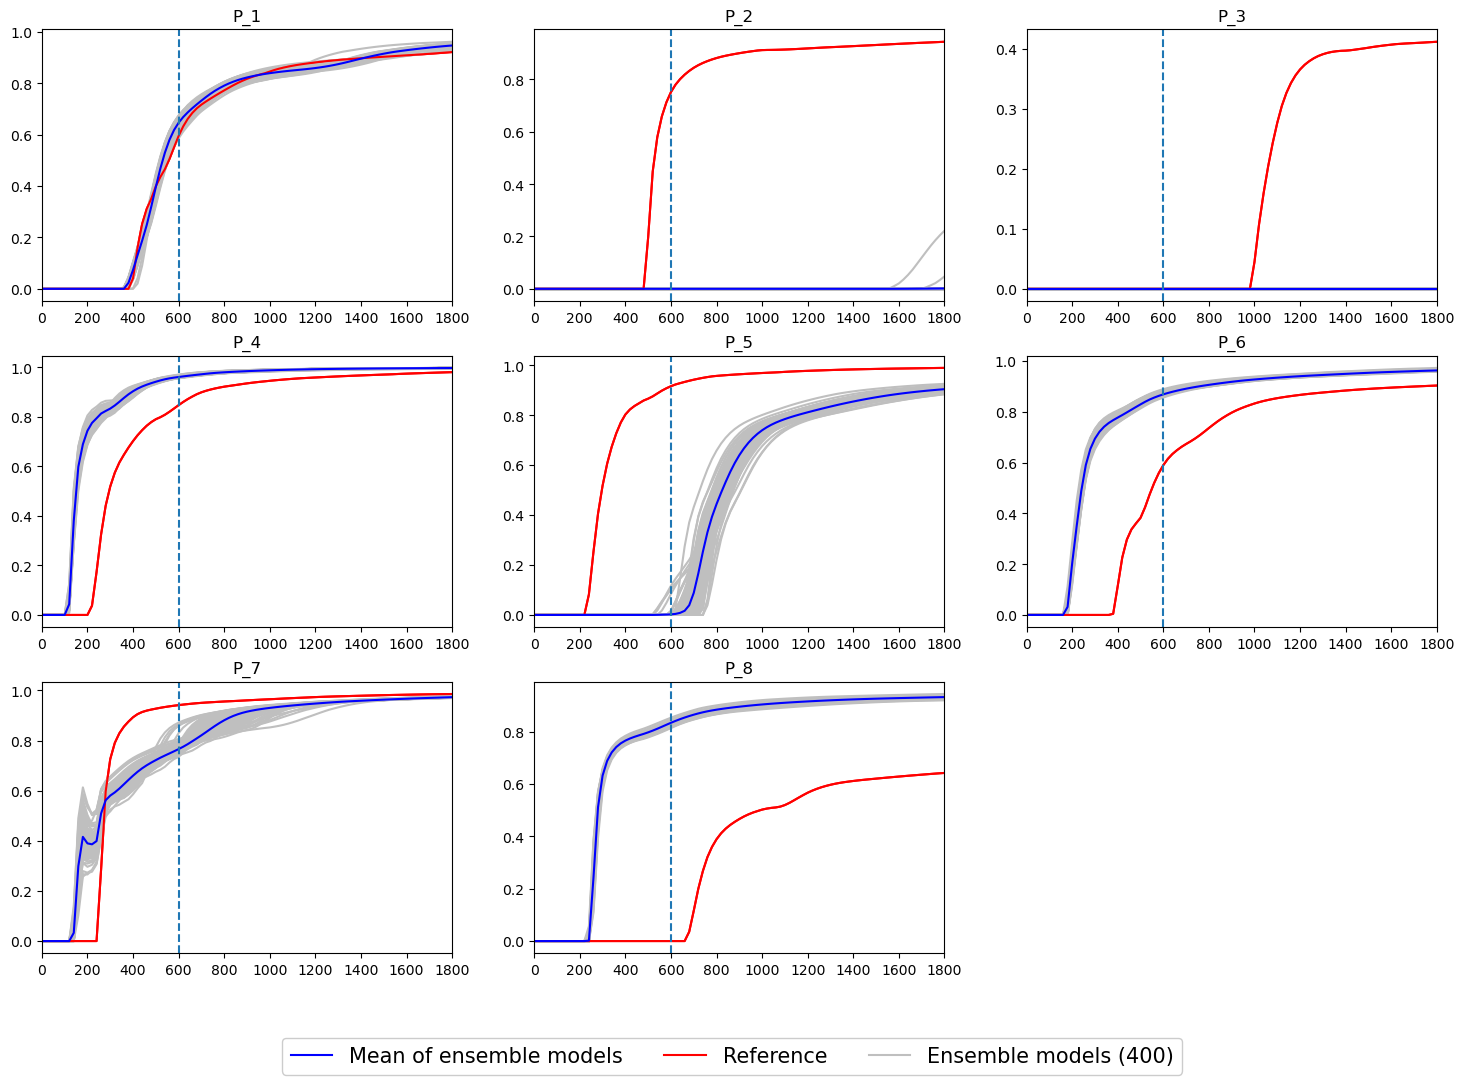

In [21]:
draw_label(evaulated_ensembles_ES, reference, 'WWCT', args)

<i> Cumulative field oil procution

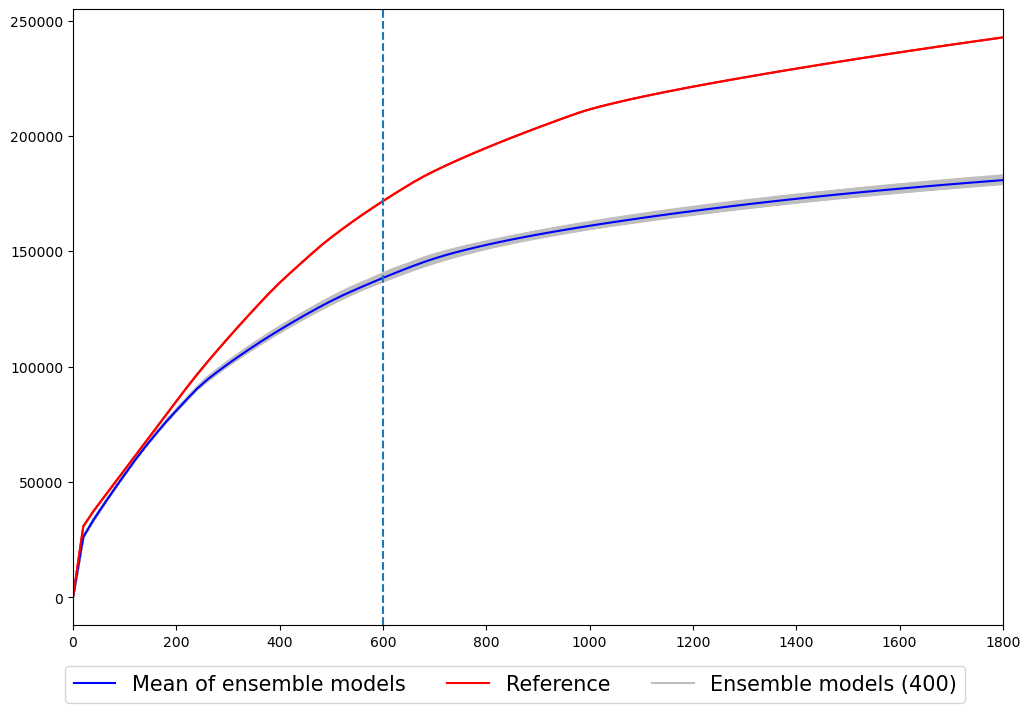

In [22]:
draw_field_label(evaulated_ensembles_ES, reference, 'FOPT', args)

<i> Cumulative field water procution

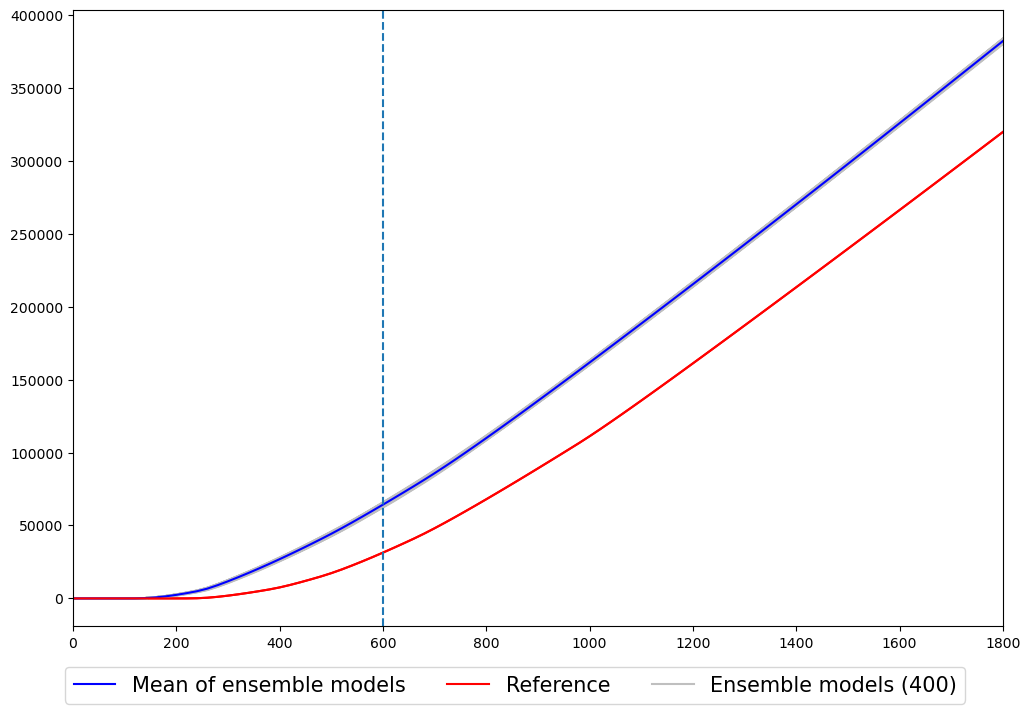

In [23]:
draw_field_label(evaulated_ensembles_ES, reference, 'FWPT', args)

### <b> 3. ES-MDA

#### <b>3.1 Set ensemble objects

In [24]:
args.characterization_algorithm = 'ES_MDA'
ensembles_ES_MDA = []
for idx in range(args.num_of_realization):
    if not idx == args.reference_number:
        ensembles_ES_MDA.append(Ensemble(args, perm[idx]))
for idx, en in enumerate(ensembles_ES_MDA):
    en.perm._name = idx
    en.characterization_algorithm = 'ES_MDA'

#### <b>3.2 Data assimilation using ES-MDA

In [25]:
solution = Ensemble_method(args, num_of_data=4)
updated_ensembles = solution.iterate(ensembles_ES_MDA, reference,isnew=True, alpha=4)
print('Finish!')

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Finish!


In [26]:
evaulated_ensembles_MDA = solution.evaluate(updated_ensembles, reference)
remove_rsm(args.assimilation_directory, args)

  0%|          | 0/200 [00:00<?, ?it/s]

HM error (%) : 64.45 
HM error after given data (%) : 47.07


#### <b>3.3 History match results using ES-MDA

<i> Well oil production rate

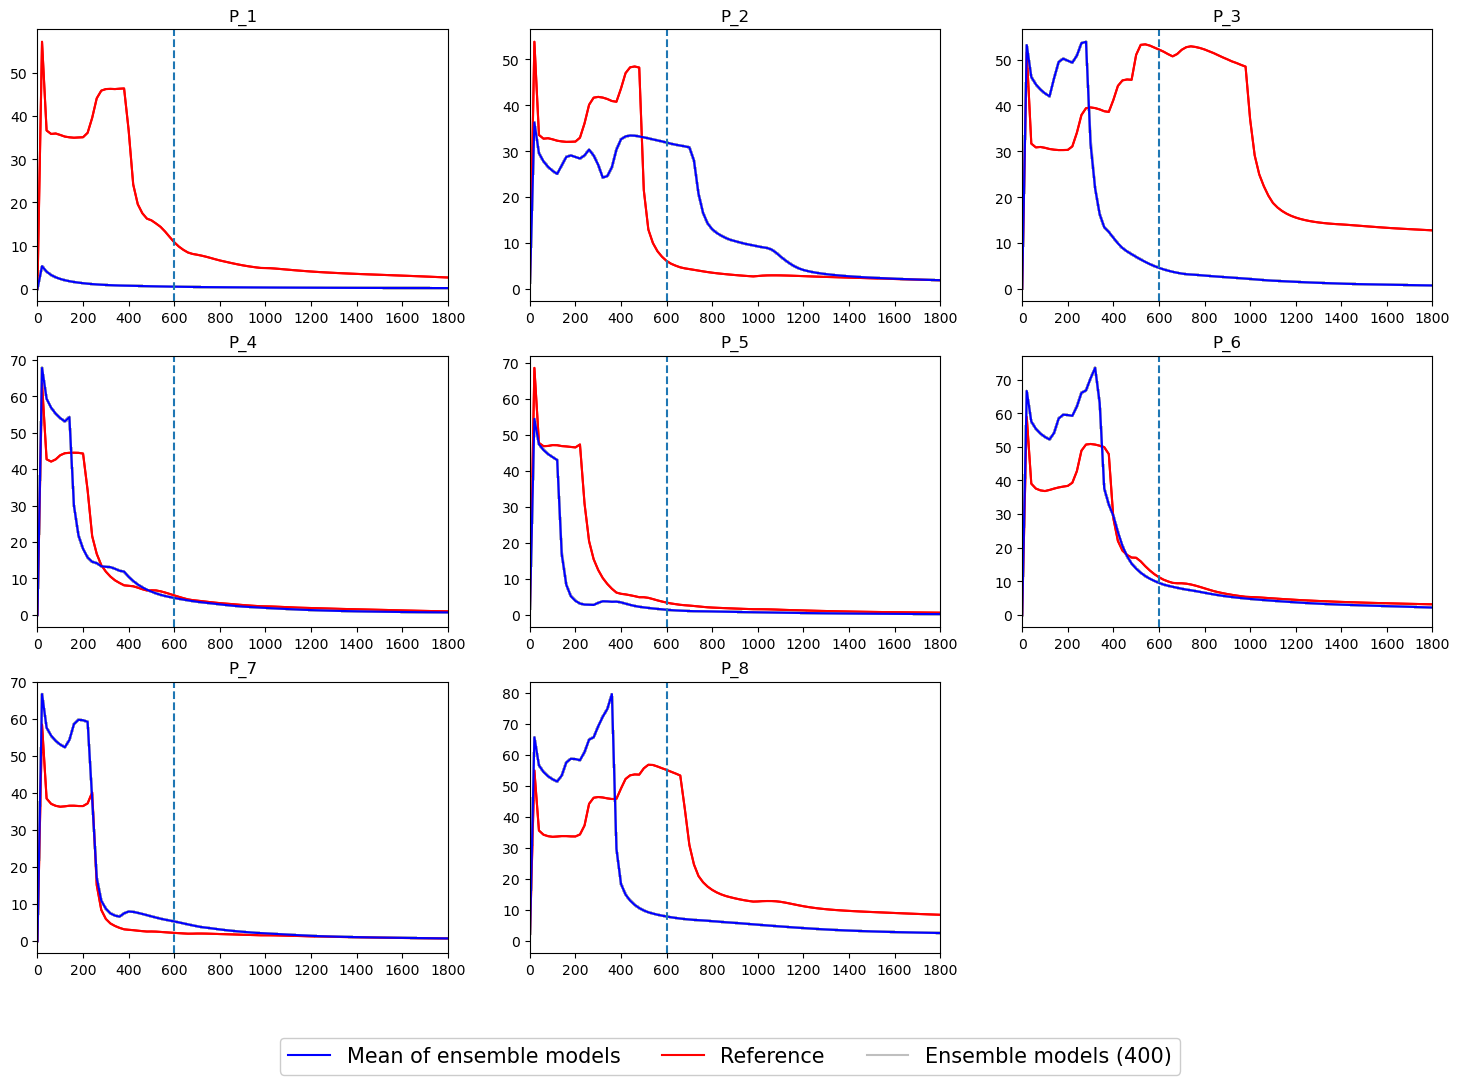

In [27]:
draw_label(evaulated_ensembles_MDA, reference, 'WOPR', args)

<i> Well watercut

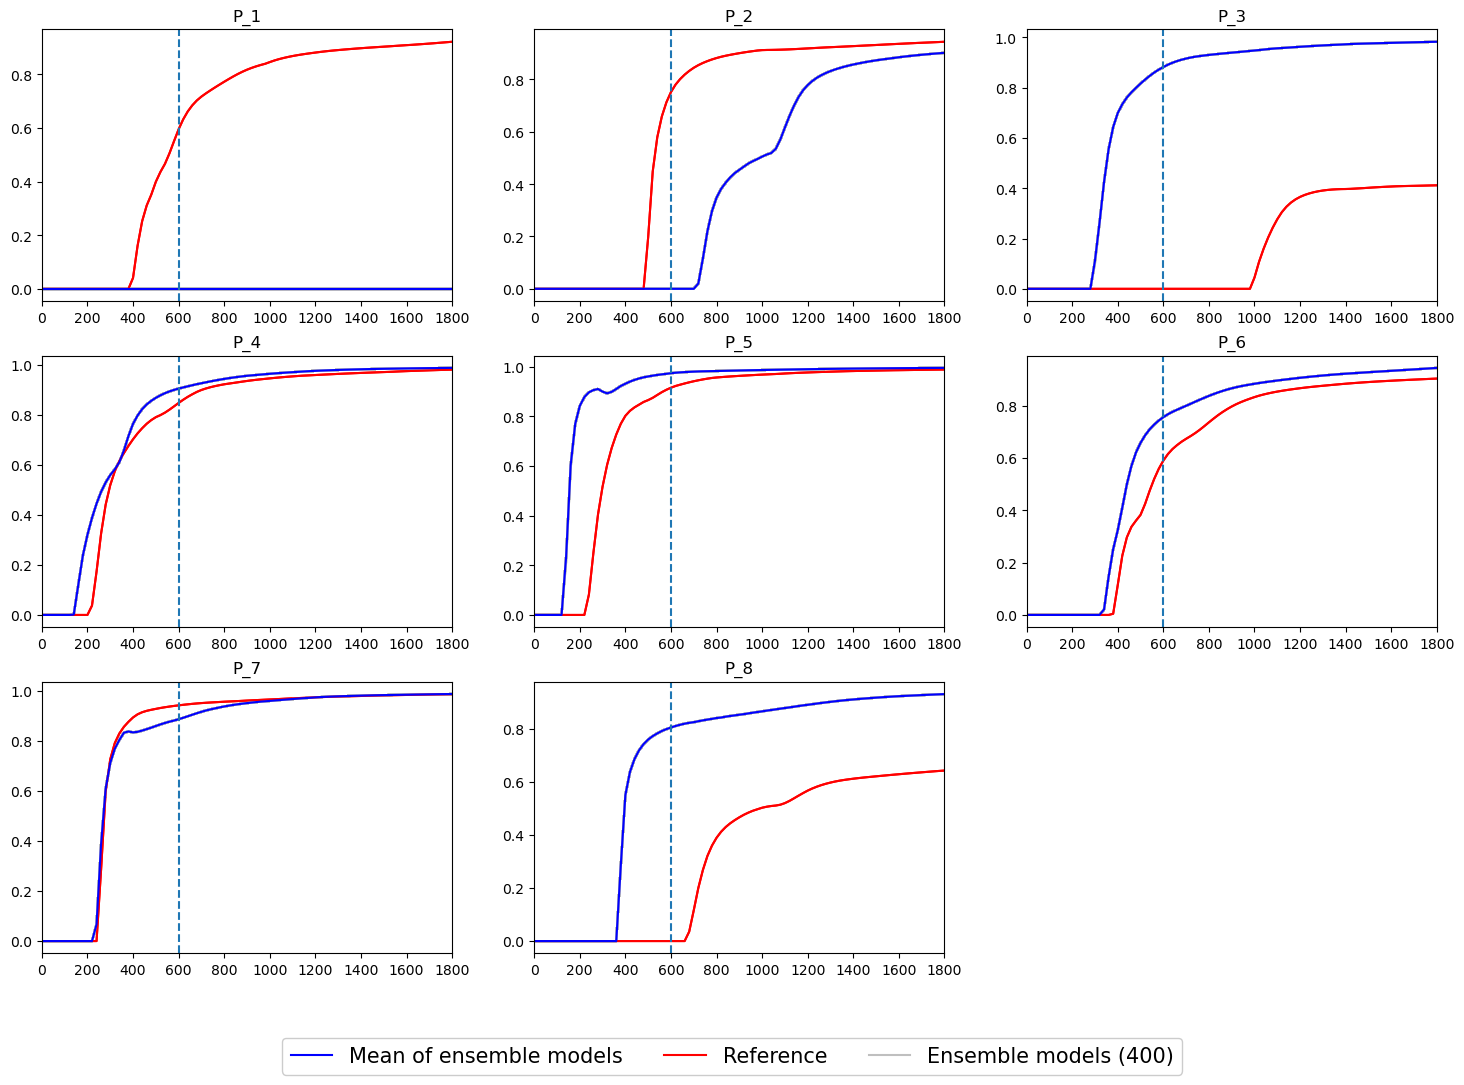

In [28]:
draw_label(evaulated_ensembles_MDA, reference, 'WWCT', args)

<i> Cumulative oil production total

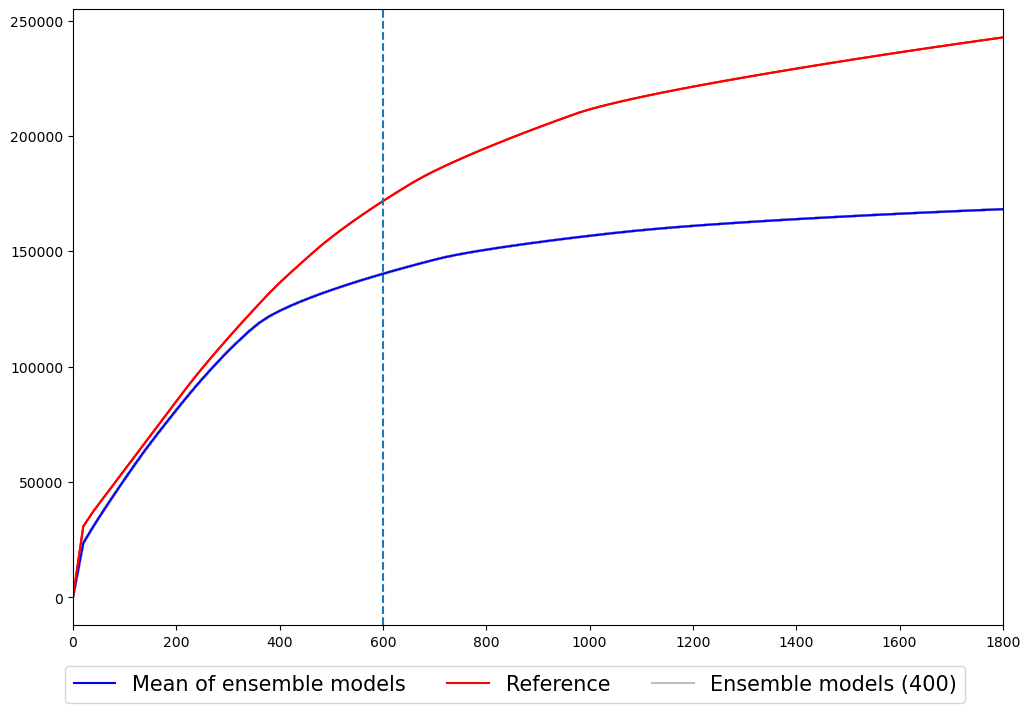

In [29]:
draw_field_label(evaulated_ensembles_MDA, reference, 'FOPT', args)

<i> Cumulative water production total

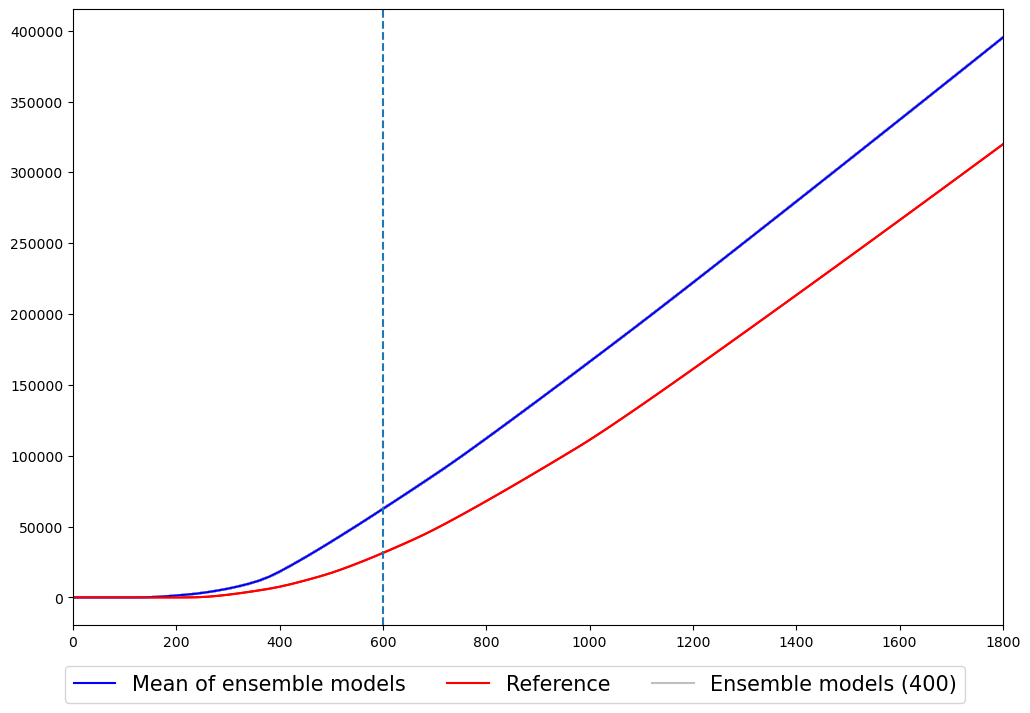

In [30]:
draw_field_label(evaulated_ensembles_MDA, reference, 'FWPT', args)

### <b> 4. ES-MDA with Variational autoencoder

#### <b>4.1 Construct VAE
<b>VAE model</b> includes <b>convolutional encoder(<i>Variational inference</i>)</b> and <b>decoder(<i>generator</i>).

In [46]:
args.num_epoch = 250
args.fc_input_dim = 128
args.device = torch.device('cpu')
mdl = GenerativeModel(args, model_name='VAE')
perm = get_parameters(args.training_filename, args.filepath, True, args.k_sand, args.k_clay)
training= [Ensemble(args, perm[idx]) for idx in range(1000)]

In [47]:
best = mdl.train_model(training)
torch.cuda.empty_cache()

  0%|          | 0/250 [00:00<?, ?it/s]

Epoch 50 		 Training Loss: 175.10900 		 Validation Loss: 185.33130
Epoch 100 		 Training Loss: 149.19372 		 Validation Loss: 159.05122
Epoch 150 		 Training Loss: 132.47985 		 Validation Loss: 158.10002
Epoch 200 		 Training Loss: 125.35999 		 Validation Loss: 162.13135
Epoch 250 		 Training Loss: 116.50390 		 Validation Loss: 158.54405
Test Loss : 159.71164


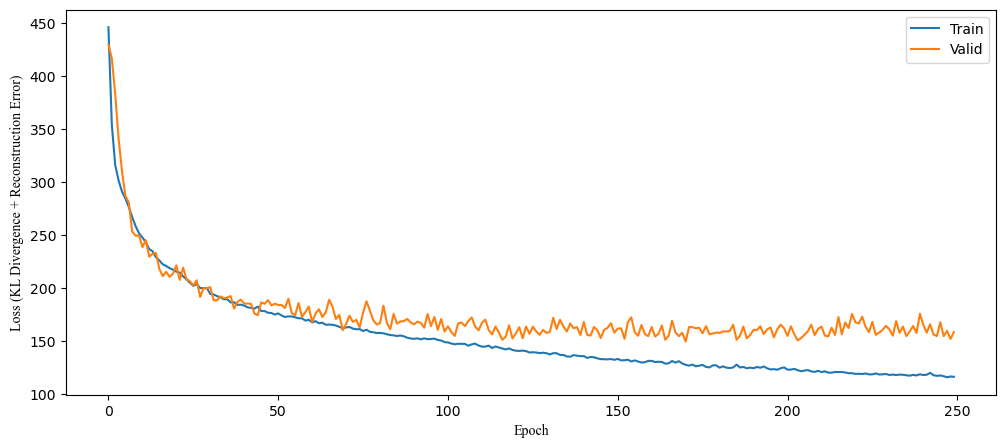

In [48]:
draw_log(mdl)

#### <b>4.2 Set ensemble objects

In [34]:
args.characterization_algorithm = 'ES_MDA'
ensembles_ES_MDA_VAE = []
for idx in range(args.num_of_realization):
    if not idx == args.reference_number:
        ensembles_ES_MDA_VAE.append(Ensemble(args, perm[idx]))
for idx, en in enumerate(ensembles_ES_MDA_VAE):
    en.perm._name = idx
    en.characterization_algorithm = 'ES_MDA'


#### <b>4.3 Data assimilation using ES-MDA with VAE

In [36]:
solution = Ensemble_method(args, num_of_data=4, use_latent=True)
updated_ensembles_VAE = solution.iterate(ensembles_ES_MDA_VAE, reference,isnew=True, alpha=4,model=mdl)

print('Finish!')

  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 137.33394
Test Loss : 516.75464


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 159.95863
Test Loss : 178.75870


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 90.10658
Test Loss : 75.50880


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 228.39894
Test Loss : 244.21196
Finish!


In [37]:
evaulated_ensembles_VAE = solution.evaluate(updated_ensembles_VAE, reference)

  0%|          | 0/200 [00:00<?, ?it/s]

HM error (%) : 114.75 
HM error after given data (%) : 118.69


#### <b>4.4 History match results using ES-MDA with VAE

<i> Well oil production rate

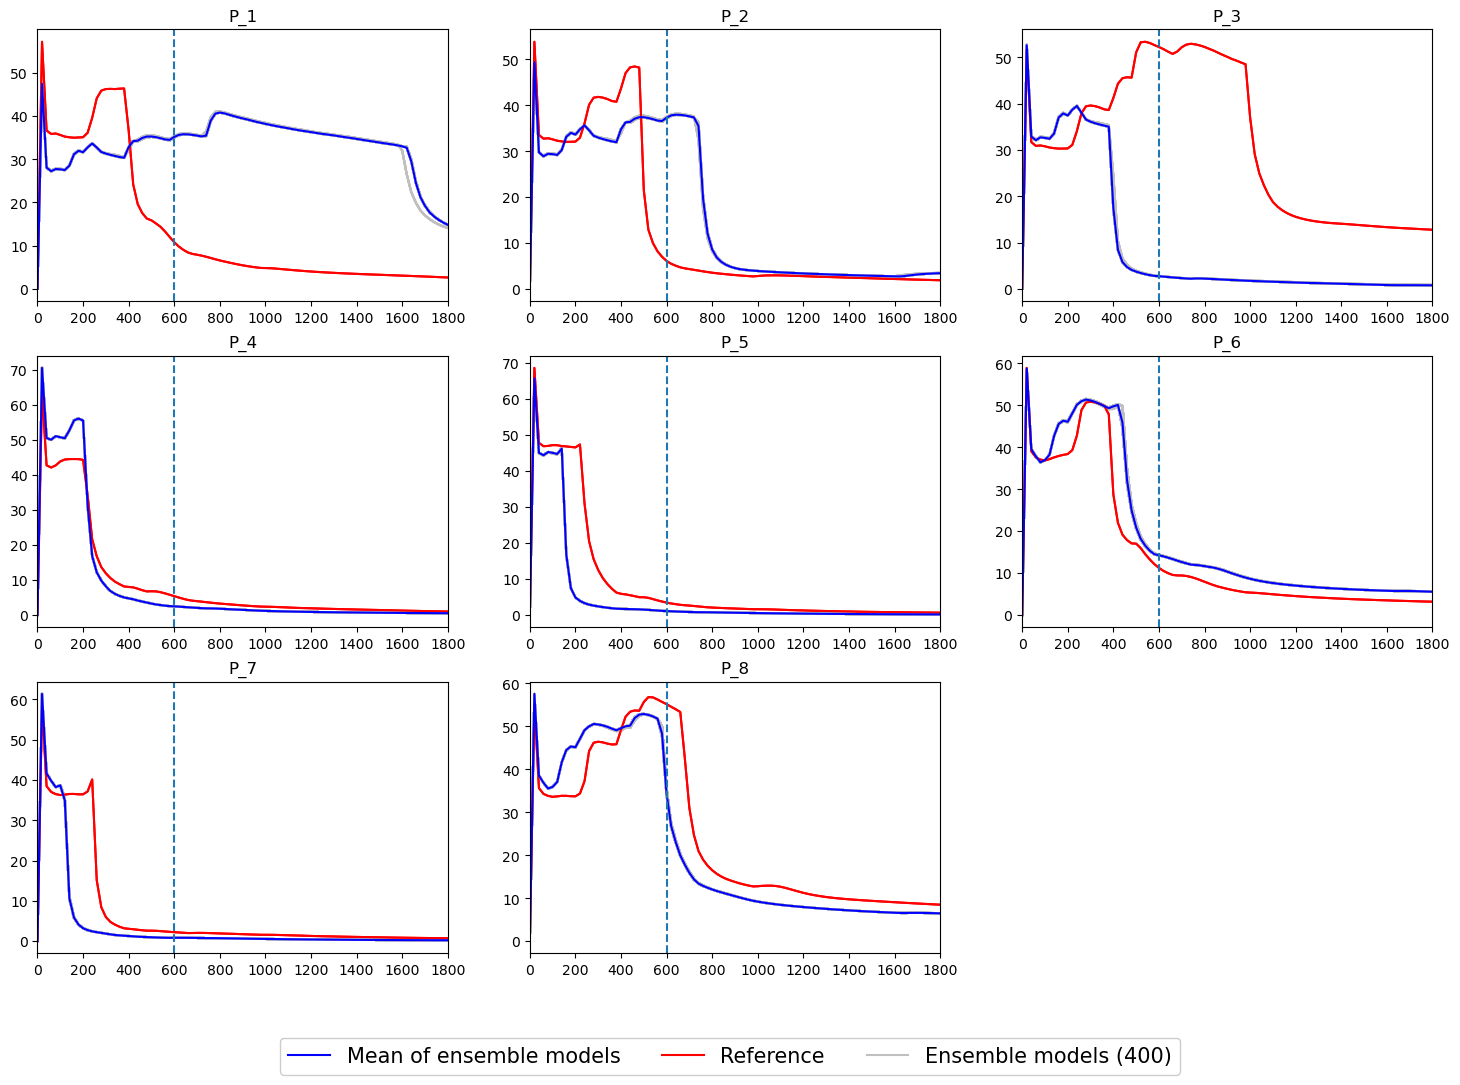

In [38]:
draw_label(evaulated_ensembles_VAE, reference, 'WOPR', args)

<i> Well watercut

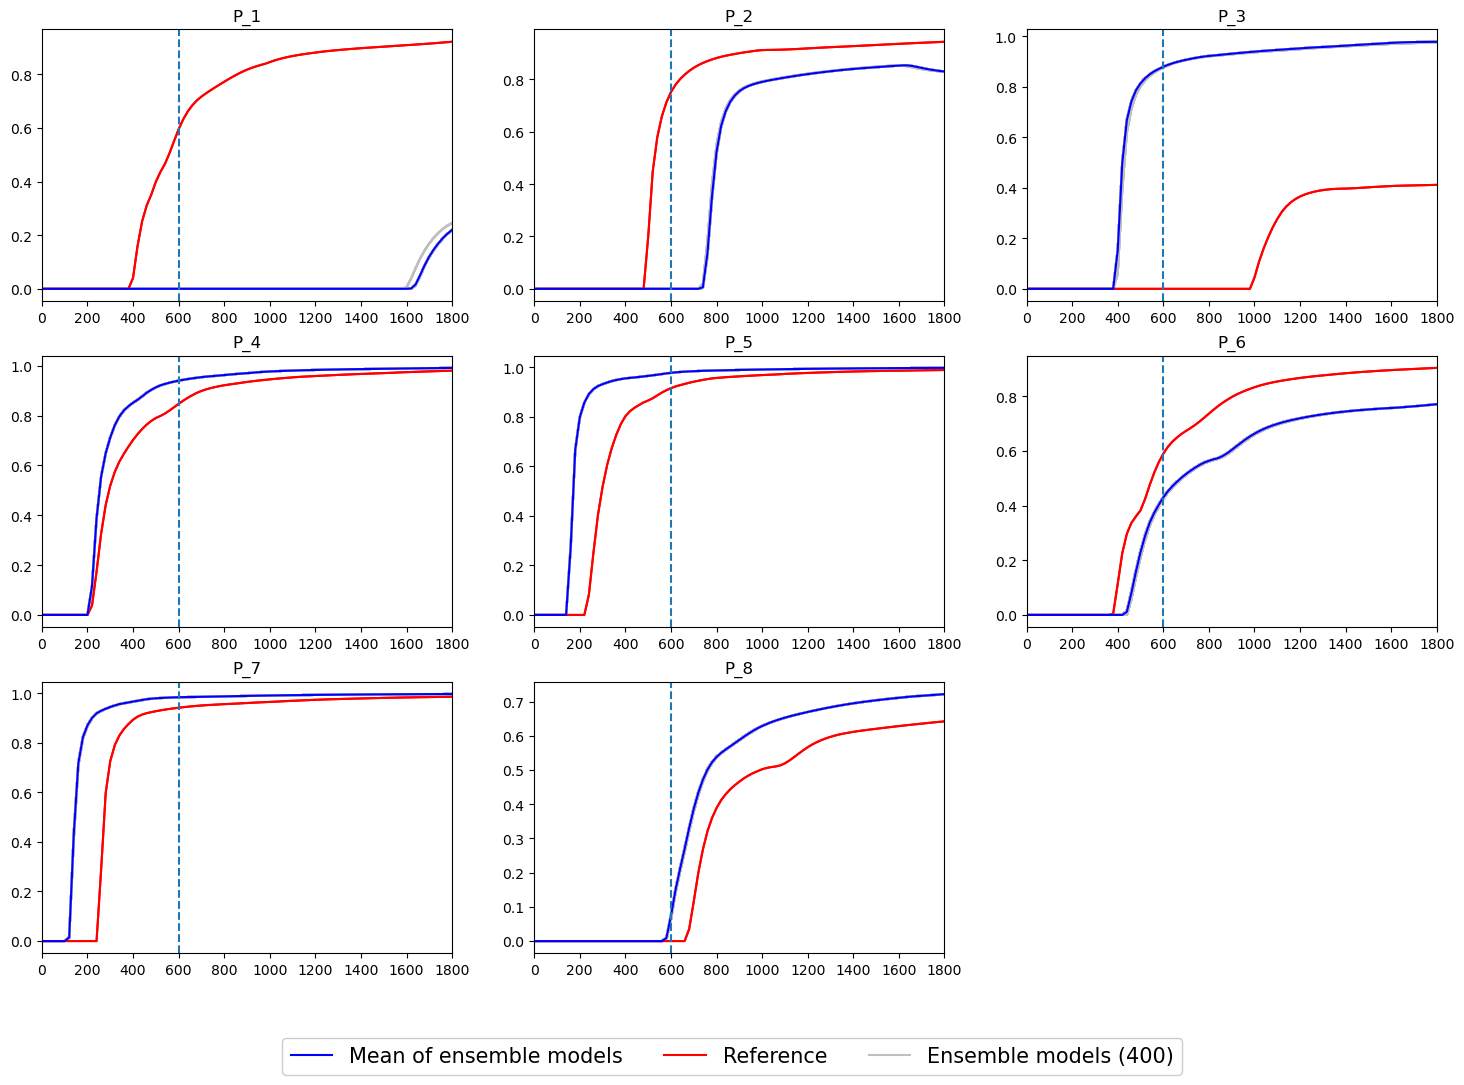

In [39]:
draw_label(evaulated_ensembles_VAE, reference, 'WWCT', args)

<i> Cumulative oil production total

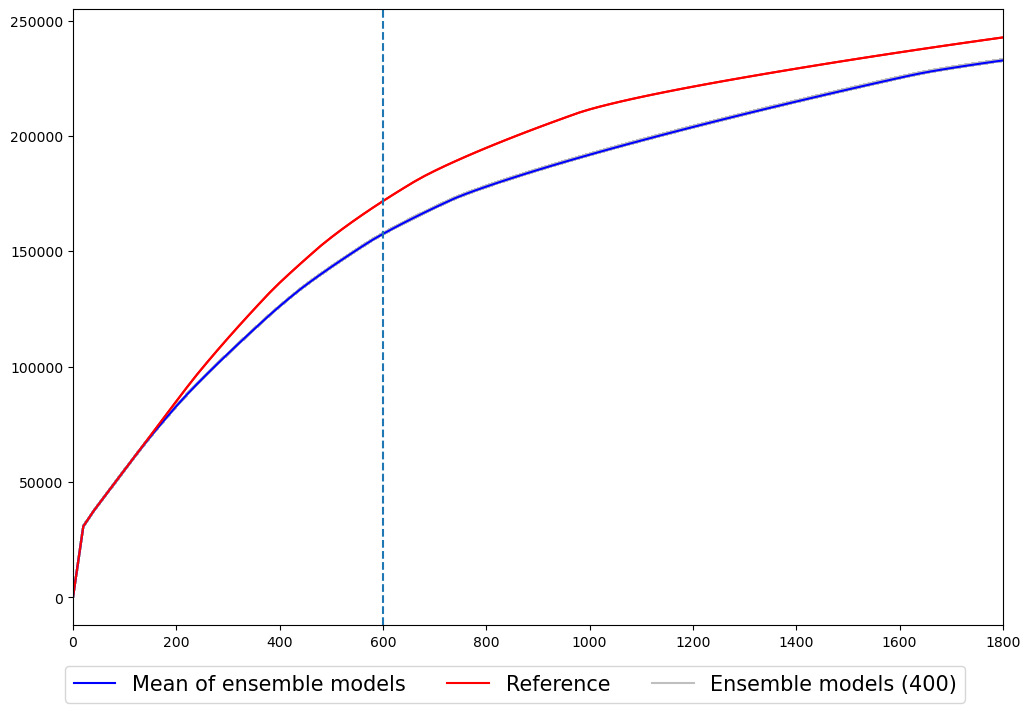

In [40]:
draw_field_label(evaulated_ensembles_VAE, reference, 'FOPT', args)

<i> Cumulative water production total

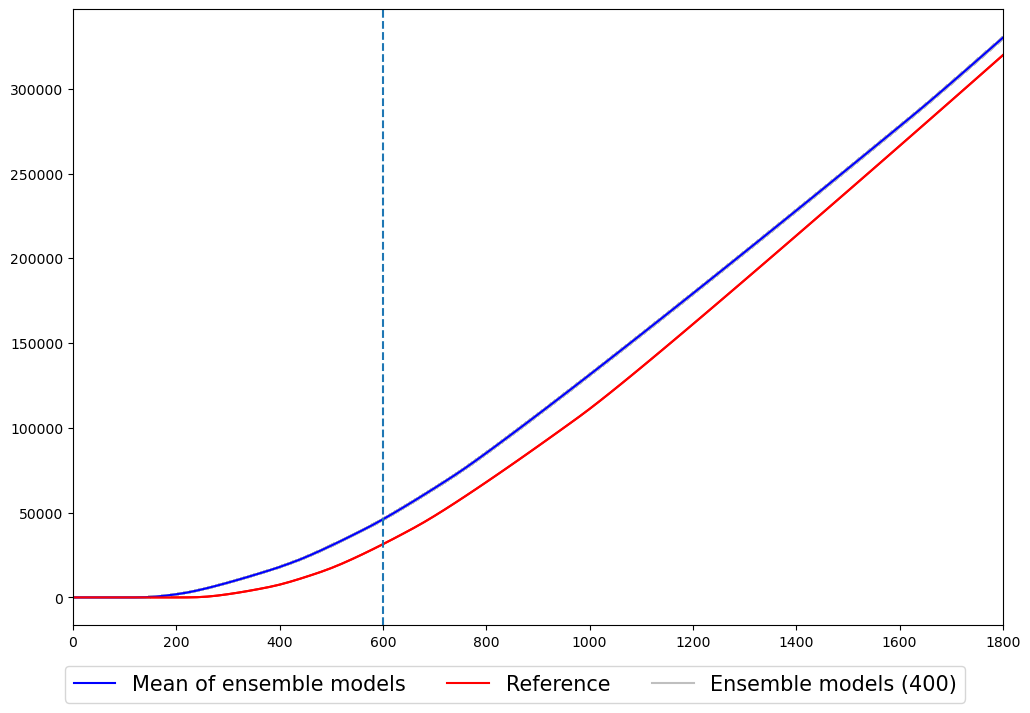

In [41]:
draw_field_label(evaulated_ensembles_VAE, reference, 'FWPT', args)

### <b>5. EnKF-VAE

#### <b>5.1 Set ensemble objects

In [49]:
args.characterization_algorithm = 'EnKF'
ensembles_EnKF_VAE = []
for idx in range(args.num_of_realization):
    if not idx == args.reference_number:
        ensembles_EnKF_VAE.append(Ensemble(args, perm[idx]))
for idx, en in enumerate(ensembles_EnKF_VAE):
    en.perm._name = idx
    en.characterization_algorithm = 'EnKF'


#### <b>5.2 Data assimilation using EnKF with VAE

In [50]:
solution = Ensemble_method(args, use_latent=True)
updated_ensembles_EnKF_VAE = solution.iterate(ensembles_EnKF_VAE, reference, isnew=True, model=mdl)

print('Finish!')

  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 138.26399
Test Loss : 546.83716


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 116.76154
Test Loss : 308.70361


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 139.31885
Test Loss : 298.43665


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 133.04306
Test Loss : 264.67279


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 123.48362
Test Loss : 275.22070


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 126.61369
Test Loss : 270.93735


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 136.06363
Test Loss : 276.10760


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 147.51338
Test Loss : 152.36362


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 140.74417
Test Loss : 213.09972


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 131.13063
Test Loss : 218.66937


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 153.11383
Test Loss : 214.86517


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 141.14693
Test Loss : 172.58319


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 163.81161
Test Loss : 178.82266


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 168.66649
Test Loss : 180.73543


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 162.94118
Test Loss : 149.51782


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 102.61934
Test Loss : 94.09253


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 148.75002
Test Loss : 153.70346


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 125.78049
Test Loss : 141.76295


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 84.05852
Test Loss : 77.69525


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 170.46172
Test Loss : 162.78398


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 160.11481
Test Loss : 147.67523


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 143.92348
Test Loss : 184.69153


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 108.41090
Test Loss : 97.46962


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 112.14112
Test Loss : 118.09846


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 128.63385
Test Loss : 118.28696


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 147.18610
Test Loss : 132.70345


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 147.34212
Test Loss : 153.47427


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 97.40993
Test Loss : 91.07814


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 119.77002
Test Loss : 106.57054


  0%|          | 0/200 [00:00<?, ?it/s]

Test Loss : 183.02383
Test Loss : 186.38091
Finish!


In [51]:
evaulated_ensembles_EnKF_VAE = solution.evaluate(updated_ensembles_EnKF_VAE, reference)

  0%|          | 0/200 [00:00<?, ?it/s]

HM error (%) : 218.31 
HM error after given data (%) : 353.60


<i> Well oil production rate

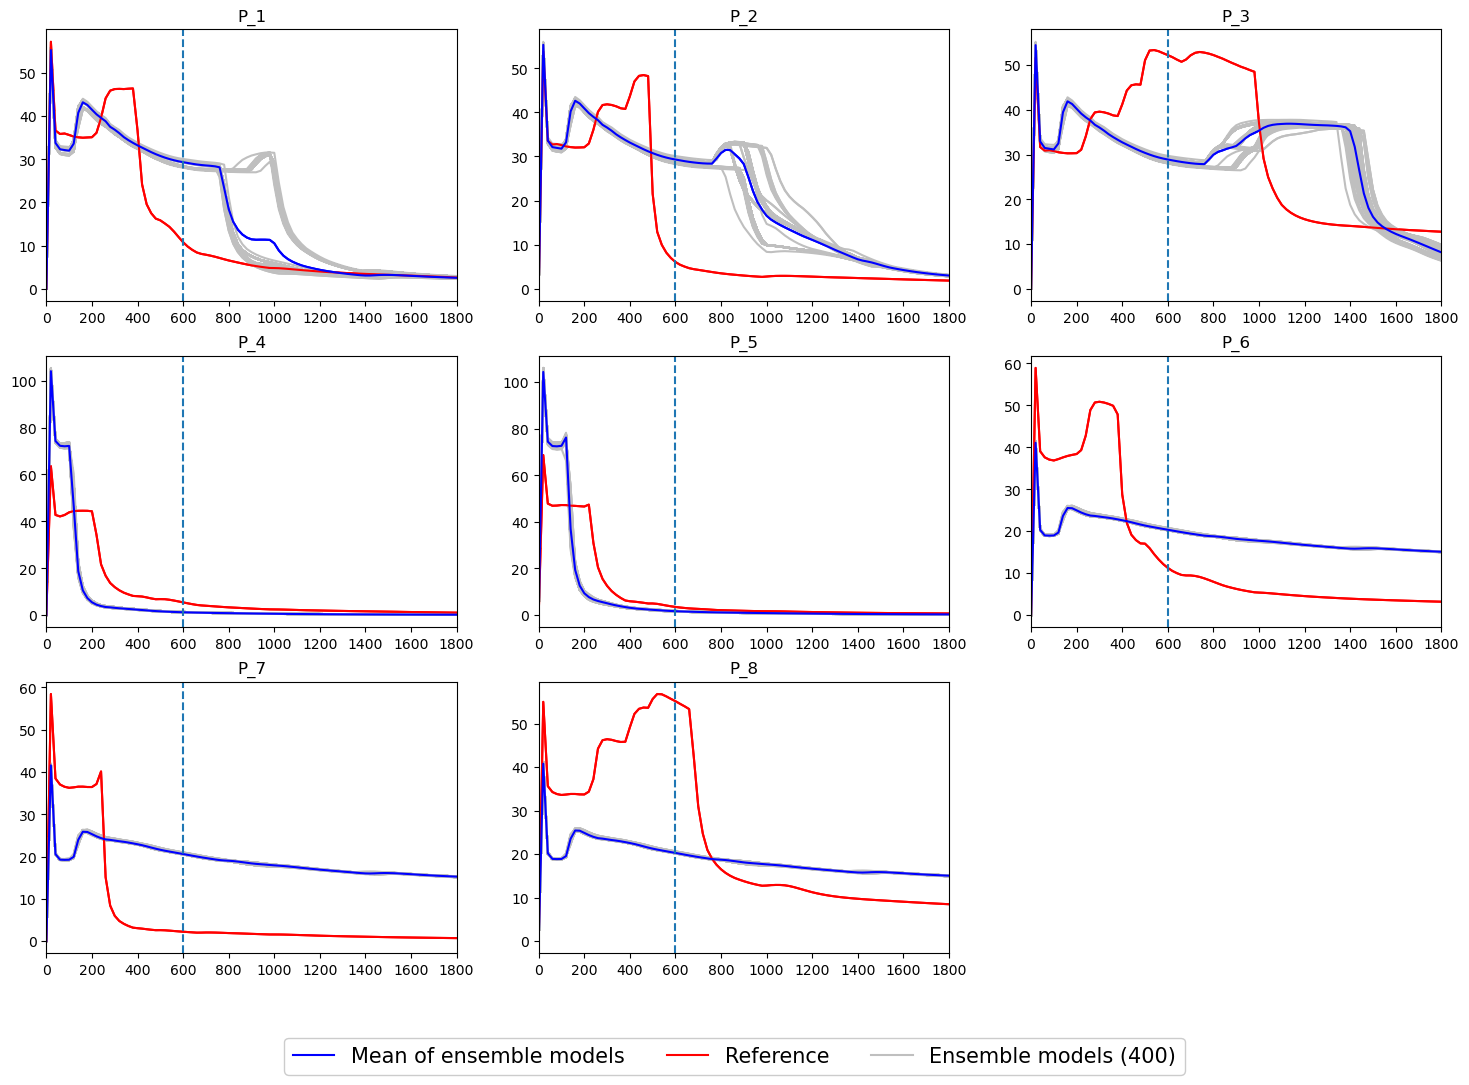

In [52]:
draw_label(evaulated_ensembles_EnKF_VAE, reference, 'WOPR', args)

<i> Well watercut

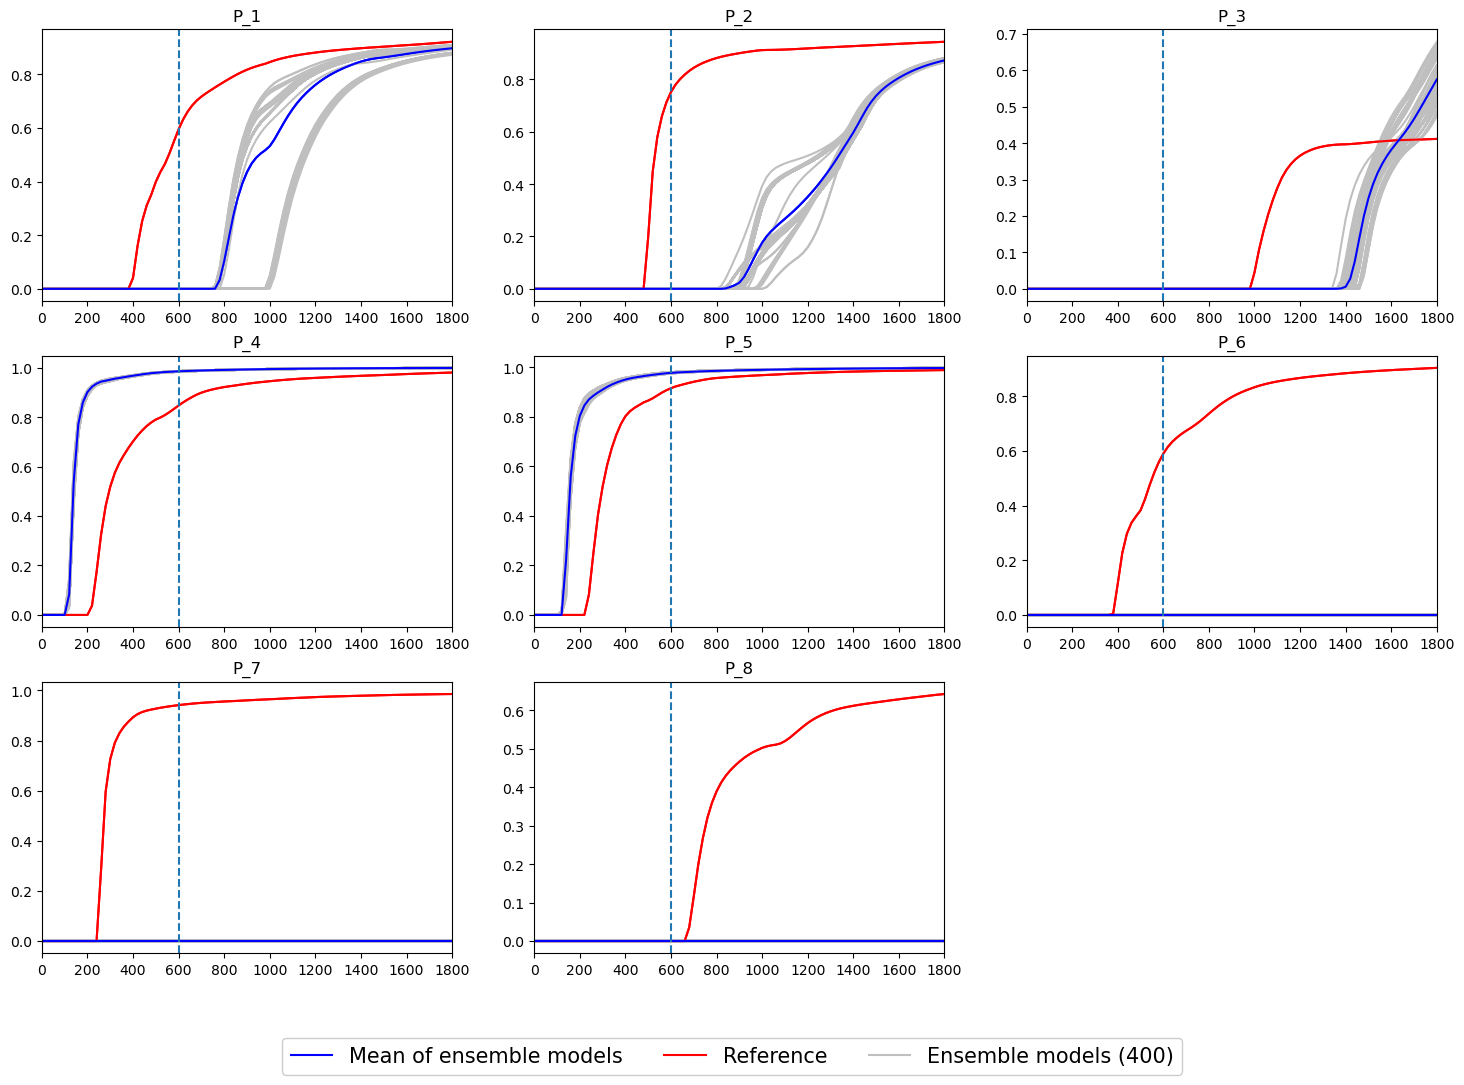

In [53]:
draw_label(evaulated_ensembles_EnKF_VAE, reference, 'WWCT', args)

<i> Cumulative oil production total

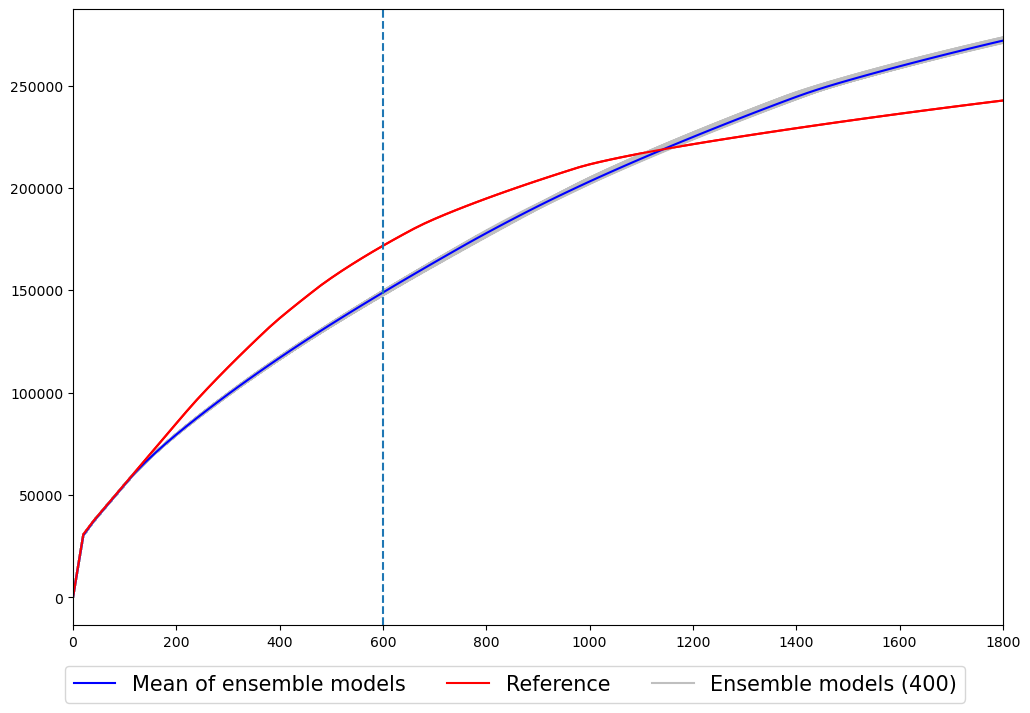

In [54]:
draw_field_label(evaulated_ensembles_EnKF_VAE, reference, 'FOPT', args)

<i> Cumulative water production total

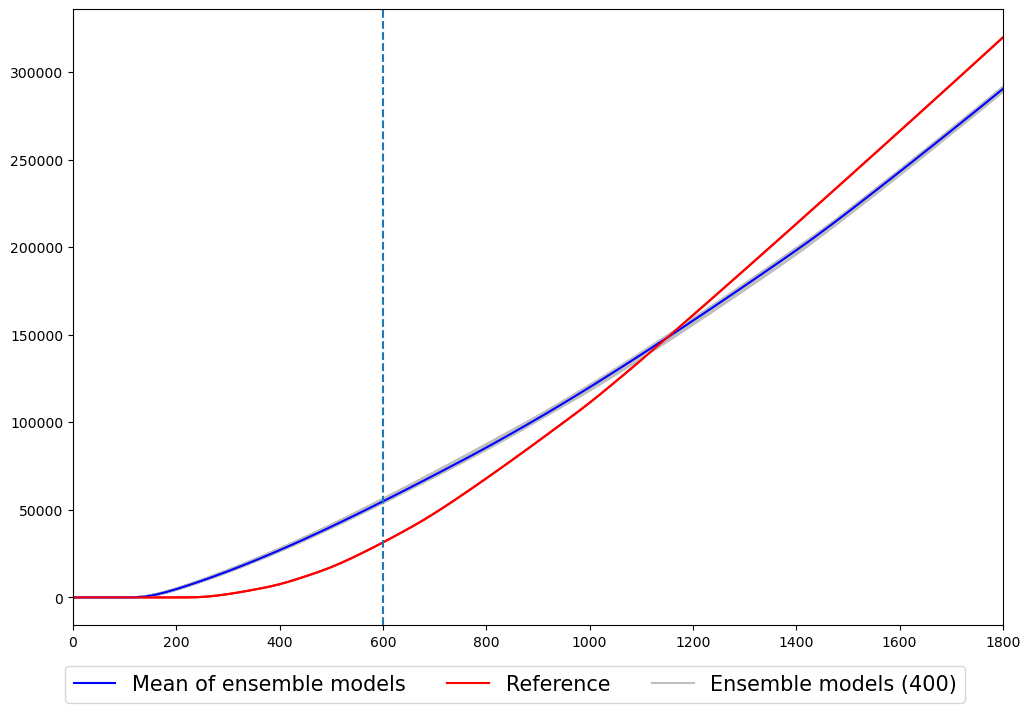

In [55]:
draw_field_label(evaulated_ensembles_EnKF_VAE, reference, 'FWPT', args)

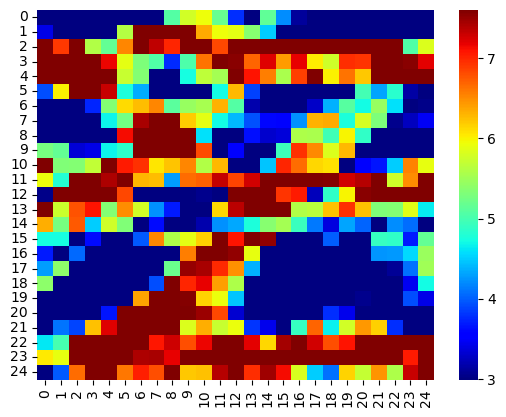

In [56]:
draw_perm(evaulated_ensembles_EnKF, args)

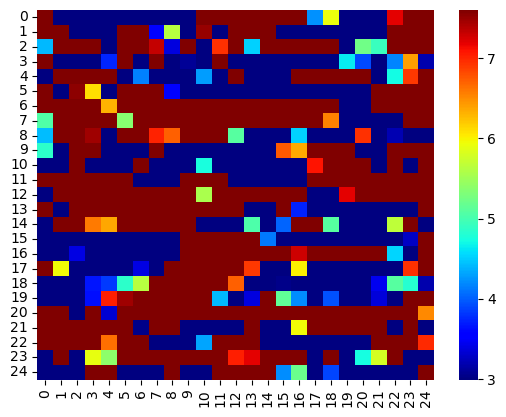

In [57]:
draw_perm(evaulated_ensembles_ES, args)

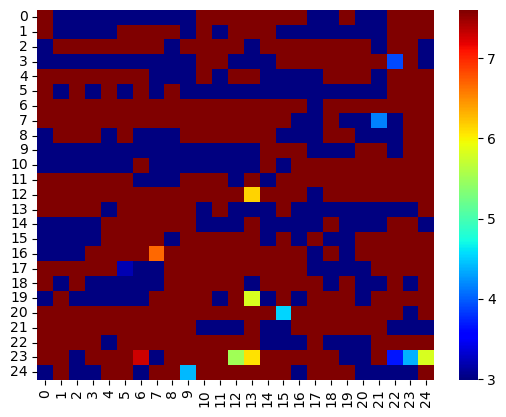

In [58]:
draw_perm(evaulated_ensembles_MDA, args)

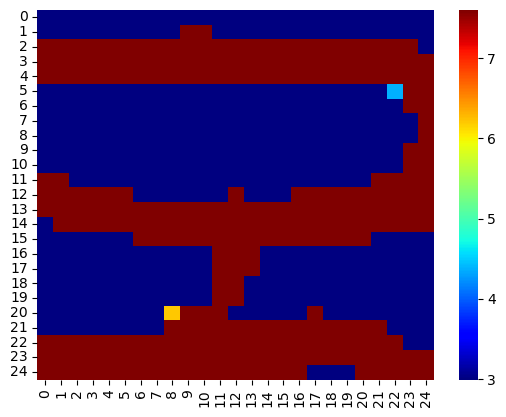

In [59]:
draw_perm(evaulated_ensembles_VAE, args)

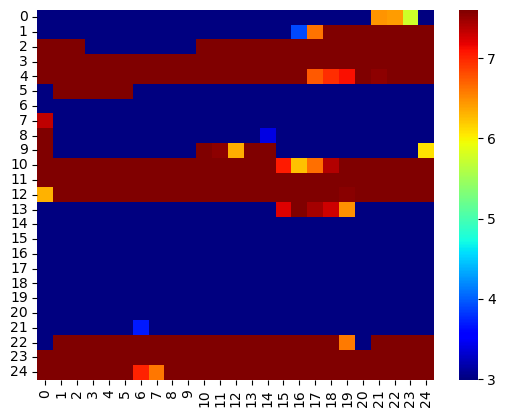

In [66]:
draw_perm(evaulated_ensembles_EnKF_VAE, args)

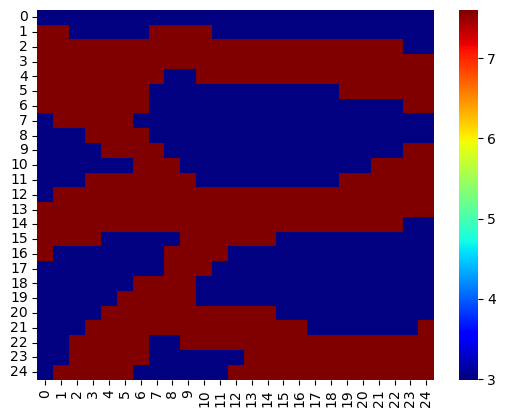

In [62]:
draw_perm(reference, args)